In [1]:
library(fitdistrplus)
library(MASS)
oots_data = read.csv(file = 'oots_days_apart.csv') #Interval between two consecutive comics released
goblins_data = read.csv(file = 'goblins_days_apart.csv')
colnames(goblins_data) <- "days"
colnames(oots_data) <- "days"

Warning message:
"package 'fitdistrplus' was built under R version 4.0.3"
Loading required package: MASS

Loading required package: survival



In [2]:
print(sort(goblins_data$days))
print(sort(oots_data$days))

  [1]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
 [19]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
 [37]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
 [55]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
 [73]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
 [91]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
[109]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
[127]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
[145]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
[163]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
[181]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
[199]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
[217]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   

I'm making the decision to remove the data points that corresponded to long, intentional hiatuses. For Goblins, this was 217 days, and for OOTS, this was 110 days. The extreme Goblins datapoint is also more than 3x larger than any of the other intervals. For this reason, I'm concerned about how it may influence the fit. 

In [4]:
oots = oots_data$days
oots = oots[oots < max(oots)]
goblins = goblins_data$days
goblins = goblins[goblins < max(goblins)]

In [9]:
fit_oots <- fitdist(oots, "geom") 
fit_goblins <- fitdist(goblins, "geom") 
summary(fit_oots)
summary(fit_goblins)


Fitting of the distribution ' geom ' by maximum likelihood 
Parameters : 
     estimate Std. Error
prob 0.162148 0.00421814
Loglikelihood:  -3383.944   AIC:  6769.888   BIC:  6775.009 

Fitting of the distribution ' geom ' by maximum likelihood 
Parameters : 
      estimate  Std. Error
prob 0.1686314 0.005292382
Loglikelihood:  -2270.816   AIC:  4543.631   BIC:  4548.369 

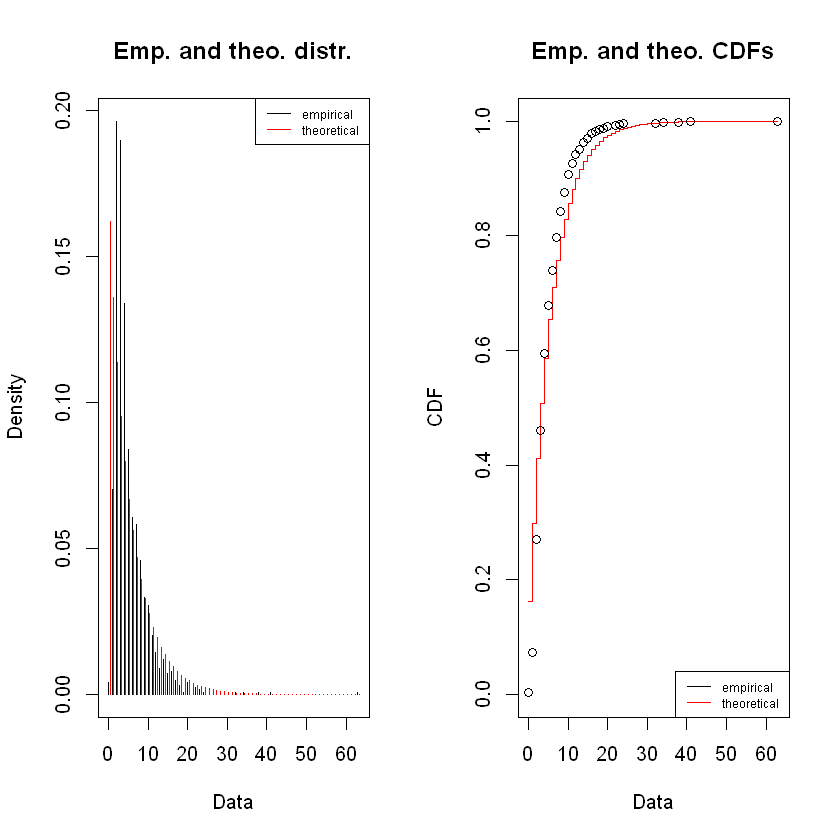

In [10]:
plot(fit_oots)

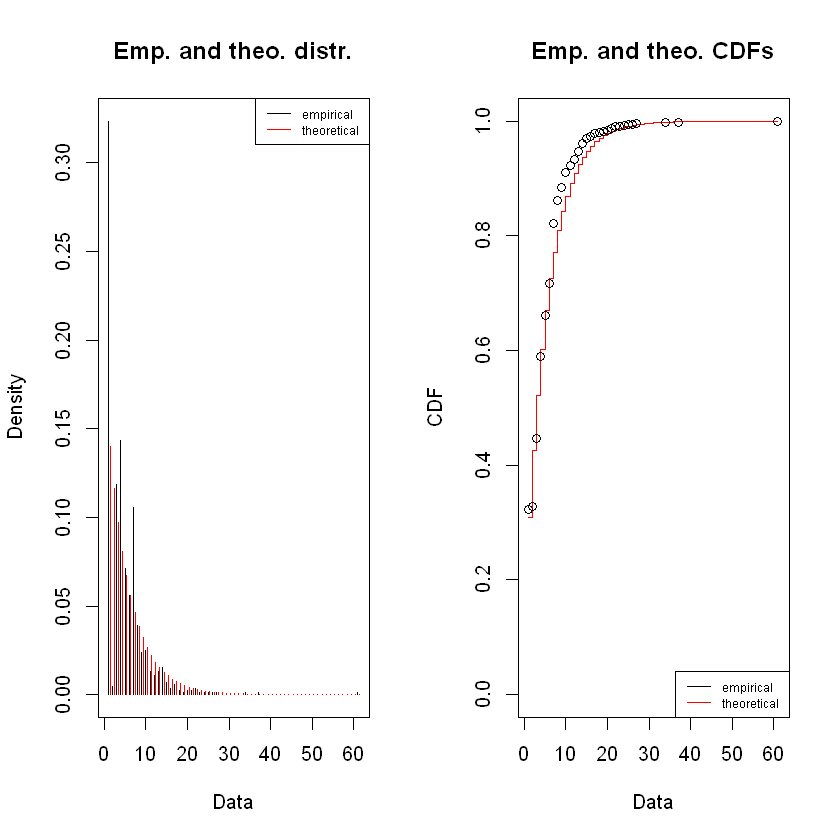

In [11]:
plot(fit_goblins)

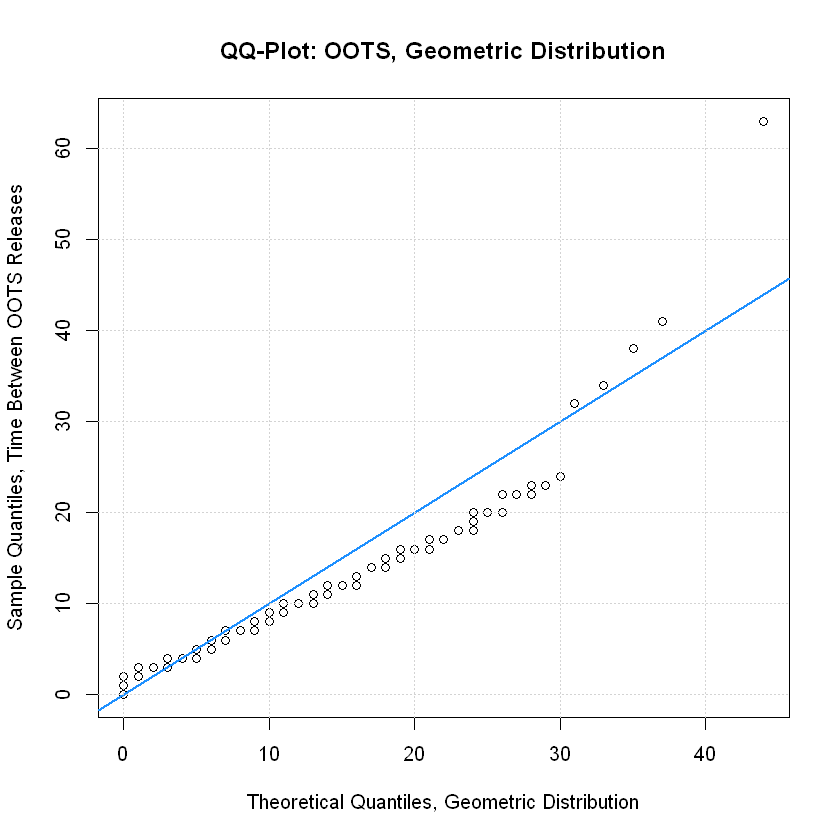

In [16]:
qqplot(x = qgeom(ppoints(oots), prob = fit_oots$estimate),
       y = oots,
       main = "QQ-Plot: OOTS, Geometric Distribution",
       xlab = "Theoretical Quantiles, Geometric Distribution",
       ylab = "Sample Quantiles, Time Between OOTS Releases")
abline(a = 0, b = 1, col = "dodgerblue", lwd = 2)
grid()

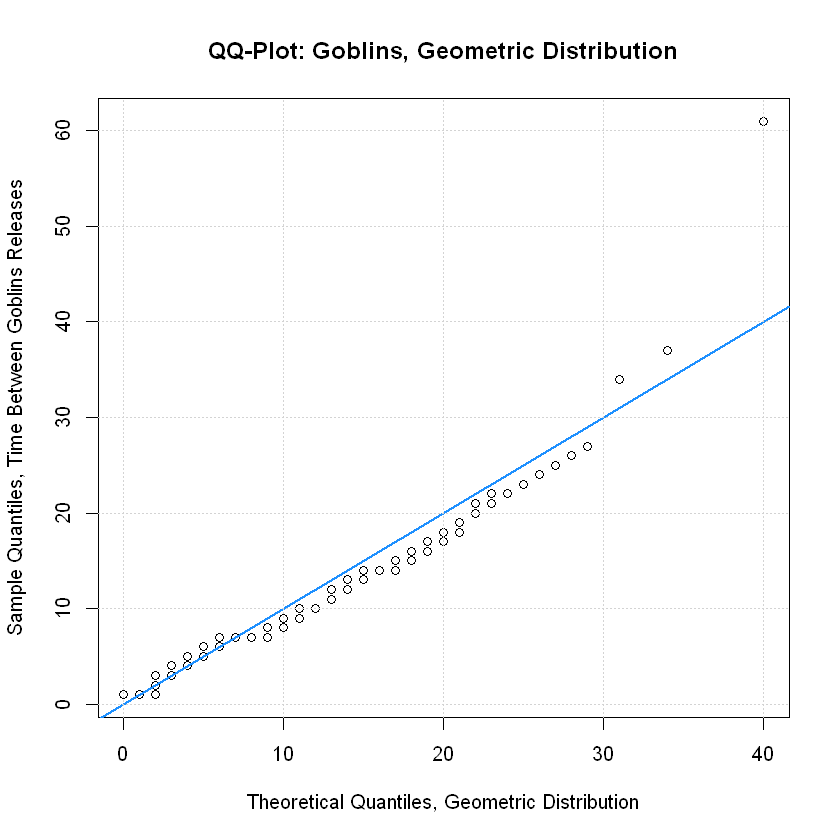

In [17]:
qqplot(x = qgeom(ppoints(goblins), prob = fit_goblins$estimate),
       y = goblins,
       main = "QQ-Plot: Goblins, Geometric Distribution",
       xlab = "Theoretical Quantiles, Geometric Distribution",
       ylab = "Sample Quantiles, Time Between Goblins Releases")
abline(a = 0, b = 1, col = "dodgerblue", lwd = 2)
grid()

In summary, based on the qq plots, both distributions are skewed right. Goblins releases seem to be better modeled by a geometric distribution than OOTS. From inspection, one of the reasons it's clear that the geometric distribution might not be a good fit is because in the OOTS histogram, our distribution is not decreasing (as you might expect with a geometric distribution). Instead, it peaks at 1 or 2 days. 